<a href="https://colab.research.google.com/github/signalarun/autism-screening/blob/main/autism_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import pandas as pd
import sklearn
import keras

from scipy.io import arff

print('Python :{}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Keras: {}'.format(keras.__version__))


Python :3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas: 1.1.5
Sklearn: 0.22.2.post1
Keras: 2.4.3


# Data preparation

In [ ]:
# csv_result-Autism-Child-Data.csv
data = arff.loadarff('/content/drive/MyDrive/dataset/autism/Autism-Child-Data.arff')
df = pd.DataFrame(data[0])
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',6.0,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',6.0,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',6.0,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',5.0,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',5.0,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/autism/csv_result-Autism-Child-Data.csv')
df.head()

#pd.read_csv('data.csv') 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [ ]:
# Normalizing values if dataset is read from arff format
# Warning run this only once!
df['A1_Score'] = df['A1_Score'].str.decode('utf-8') 
df['A2_Score'] = df['A2_Score'].str.decode('utf-8') 
df['A3_Score'] = df['A3_Score'].str.decode('utf-8') 
df['A4_Score'] = df['A4_Score'].str.decode('utf-8') 
df['A5_Score'] = df['A5_Score'].str.decode('utf-8') 
df['A6_Score'] = df['A6_Score'].str.decode('utf-8') 
df['A7_Score'] = df['A7_Score'].str.decode('utf-8') 
df['A8_Score'] = df['A8_Score'].str.decode('utf-8') 
df['A9_Score'] = df['A9_Score'].str.decode('utf-8') 
df['A10_Score'] = df['A10_Score'].str.decode('utf-8') 
#df['age'] = df['age'].str.decode('utf-8') 
df['gender'] = df['gender'].str.decode('utf-8') 
df['ethnicity'] = df['ethnicity'].str.decode('utf-8') 
df['jundice'] = df['jundice'].str.decode('utf-8') 
df['austim'] = df['austim'].str.decode('utf-8') 
df['contry_of_res'] = df['contry_of_res'].str.decode('utf-8') 
df['used_app_before'] = df['used_app_before'].str.decode('utf-8') 
#df['result'] = df['result'].str.decode('utf-8') 
df['age_desc'] = df['age_desc'].str.decode('utf-8') 
df['relation'] = df['relation'].str.decode('utf-8') 
df['Class/ASD'] = df['Class/ASD'].str.decode('utf-8') 
df.head()

AttributeError: ignored

In [ ]:
# print the shape of the DataFrame, so we can see how many examples we have
print('Shape of a data point: {}'.format(df.shape))
df.dtypes

Shape of a data point: (292, 21)


A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

In [ ]:
# drop unwanted columns
df = df.drop(['result', 'age_desc'], axis=1)


In [ ]:
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
relation           object
Class/ASD          object
dtype: object

In [ ]:
X = df.drop(['Class/ASD'], 1)
Y = df['Class/ASD']

## Generating one-hot encoding of dataset

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age_10,age_11,age_4,age_5,age_6,age_7,age_8,age_9,age_?,gender_f,gender_m,ethnicity_?,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European,jundice_no,jundice_yes,austim_no,austim_yes,contry_of_res_Afghanistan,contry_of_res_Argentina,contry_of_res_Armenia,contry_of_res_Australia,...,contry_of_res_Ireland,contry_of_res_Isle of Man,contry_of_res_Italy,contry_of_res_Japan,contry_of_res_Jordan,contry_of_res_Kuwait,contry_of_res_Latvia,contry_of_res_Lebanon,contry_of_res_Libya,contry_of_res_Malaysia,contry_of_res_Malta,contry_of_res_Mexico,contry_of_res_Nepal,contry_of_res_Netherlands,contry_of_res_New Zealand,contry_of_res_Nigeria,contry_of_res_Oman,contry_of_res_Pakistan,contry_of_res_Philippines,contry_of_res_Qatar,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Saudi Arabia,contry_of_res_South Africa,contry_of_res_South Korea,contry_of_res_Sweden,contry_of_res_Syria,contry_of_res_Turkey,contry_of_res_U.S. Outlying Islands,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,used_app_before_no,used_app_before_yes,relation_?,relation_Health care professional,relation_Parent,relation_Relative,relation_Self,relation_self
0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [ ]:
Y = pd.get_dummies(Y)
Y.head()

,NO,YES
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
print('Shape of X: {}'.format(X.shape))
print('Shape of Y: {}'.format(Y.shape))

Shape of X: (292, 96)
Shape of Y: (292, 2)


### Splitting dataset into Train, Validation and Test set

In [ ]:
from sklearn import model_selection

# Generate Training, Test and Validation datasets   
def prepare_datasets(test_size, validation_size):
  X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, stratify=Y, random_state=42, test_size = test_size)
  X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_train, Y_train, stratify=Y_train, test_size=validation_size)
  return X_train, X_validation, X_test, Y_train, Y_validation, Y_test




In [ ]:
X_train, X_validation, X_test, Y_train, Y_validation, Y_test = prepare_datasets(0.2, 0.2)

## Classification

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig = plt.figure(figsize=(15, 5))
    fig.suptitle('Metrices',fontsize=15)

    fig, axs = plt.subplots(2)



    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="Train Accuracy")
    axs[0].plot(history.history["val_accuracy"], label="Test Accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_xlabel("Epoch")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="Train Error")
    axs[1].plot(history.history["val_loss"], label="Test Error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    fig.tight_layout(pad=1.0)
    plt.show()



In [ ]:
def create_model():
 # create model
 model = Sequential()
 model.add(Dense(8, input_dim=96, kernel_initializer='normal', activation='relu'))
 model.add(Dense(4, kernel_initializer='normal', activation='relu'))
 model.add(Dropout(0.25))
 model.add(Dense(2, activation='sigmoid'))
 # compile model
 adam = Adam(lr=0.001)
 model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
 return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 776       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_4 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 10        
Total params: 822
Trainable params: 822
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=512, batch_size=10, verbose = 1)

Epoch 1/512
19/19 [==============================] - 1s 17ms/step - loss: 0.6922 - accuracy: 0.6311 - val_loss: 0.6914 - val_accuracy: 0.7447
Epoch 2/512
19/19 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6739 - val_loss: 0.6900 - val_accuracy: 0.6596
Epoch 3/512
19/19 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.6379 - val_loss: 0.6875 - val_accuracy: 0.6809
Epoch 4/512
19/19 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.6060 - val_loss: 0.6833 - val_accuracy: 0.5745
Epoch 5/512
19/19 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6641 - val_loss: 0.6773 - val_accuracy: 0.6596
Epoch 6/512
19/19 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6160 - val_loss: 0.6684 - val_accuracy: 0.7234
Epoch 7/512
19/19 [==============================] - 0s 4ms/step - loss: 0.6587 - accuracy: 0.7004 - val_loss: 0.6553 - val_accuracy: 0.6809
Epoch 8/512


In [ ]:
history.history.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Figure size 1080x360 with 0 Axes>

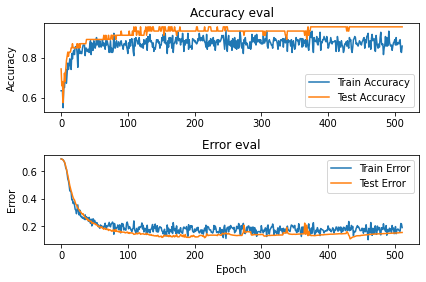

In [ ]:
# plot accuracy/error for training and validation
plot_history(history)

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict_classes(X_test)
predictions

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])